In [1]:
%%html
<style type="text/css">
  span.ecb { background: yellow; }
</style>
<span class="ecb">Grading comments will be in yellow</span>

In [2]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

# from IPython.display import display
import itertools

# ATMO 5331 - Homework #2
### Spring 2026, Due 26 Feb, 2026, before start of class.

When working these problems, you will need to code up equations for and make plots of various electrostatic quantities. Turn in a Jupyter notebook with your figures and which I can run to reproduce your results. Label your axes like a professional.

Please also enter your derivation into the notebook using $LaTeX$.

Do not copy-paste code; if you feel tempted, write a function that repeats operations that follow a certain template. Those functions can be in the notebook itself, or in an accompanying .py file that you import into the notebook.

Provide any needed discussion as commentary in the notebook in a Markdown cell.

### 1. E from a charged slab

In lecture we used Gauss's law to show that the electric field produced by a thin sheet of charge with surface charge density $\sigma_q$ is given by $E(z) = \sigma_q / 2\epsilon$.

Using a similar approach, derive an expression for the vertical profile of the electric field produced by an inifinitely wide slab of space charge with thickness $H$ whose bottom is at a height of $z_0$ and has charge density $\rho$.

<span class="ecb">(5)</span>.

Above and below the slab, the flux, 

$$
\phi = EA + EA = 2EA
$$

Gauss's law: 

$$
\oint \mathbf{E} \cdot \mathbf{n} \, dA
$$

Use the E sheet equation, and switch the surface charge density (sigma_q) for the volumetric charge density (rho), taking into account the height of the slab (H) and the area (A): 

$$
\frac{\rho H A}{\epsilon}
$$

above the slab and 

$$
-\frac{\rho H A}{\epsilon}
$$

 below the slab.

Set this equal to the flux:  

$$
2 E A
=
\frac{\rho H A}{\epsilon}
$$

$$
E = \pm \frac{\rho H}{\epsilon}
$$

above and below the slab.

Inside the slab, the center z_c = z_0 + H/2. So the height used for this scenario is z - (z_0 + H/2). Also, use EA instead of 2EA for the flux since we are inside the slab.  

$$
E A
=
\frac{\rho \left( z - z_0 - \frac{H}{2} \right) A}{\epsilon}
$$

 $$
E = \frac{\rho \left( z - z_0 - \frac{H}{2} \right)}{\epsilon}
$$







### 2. Plotting E
Using the given equation and the one you derived in problem 1., complete the two functions below, as described by their documentation strings (docstrings).

<span class="ecb">(10)</span>.

In [17]:
epsilon = 8.854e-12 #F/m

def sheet_E(z, z_0, sigma_q):
    """
    Given a height z, return the electric field produced by an
    inifintely thin layer horizontal of charge located at height z_0, 
    with surface charge density sigma_q.
    
    Units:
    """
    
    # Replace this line with your own E.
    E_direction = np.sign(z-z_0)
    E = sigma_q /(2 * epsilon)*E_direction
    
    return E

def slab_E(z, z_0, H, rho):
    """ 
    Given a height z, return the electric field produced by an 
    infinite horizontal slab of charge whose bottom is at z_0, top is at z_0+H
    and with constant volumetric charge density rho.
    
    Units:
    """
    if z < z_0:
        E = -rho * H / (2 * epsilon)

    elif z_0 <= z <= z_0 + H:
        E = rho / epsilon * (z - z_0 -(H/2))

    else:
        E = rho * H / (2 * epsilon)

    return E

all_z = np.arange(0, 15e3, 100.0) # Use these altitudes when making plots.

### 3. Plots

Ignoring the effect of a conducting ground plane, 

**a.** Plot the electric field profile produced by an inifinitely thin layer of charge (in isolation) at a cloud top height of 8 km for a surface charge density of +.5 µC/m$^2$.

**b.** Plot the electric field profile produced by an inifinitely thin layer of charge (in isolation) at a cloud bottom height of 5 km for a surface charge density of +.5 µC/m$^2$.

**c.** Plot the electric field profile for a slab (in isolation) using a charge density of -1 nC/m$^3$, bottom height of 6 km, and thickness of 1 km.

**d.** Plot the sum of the electric fields calculated in a,b,c.

<span class="ecb">(5 each, 15 total)</span>.

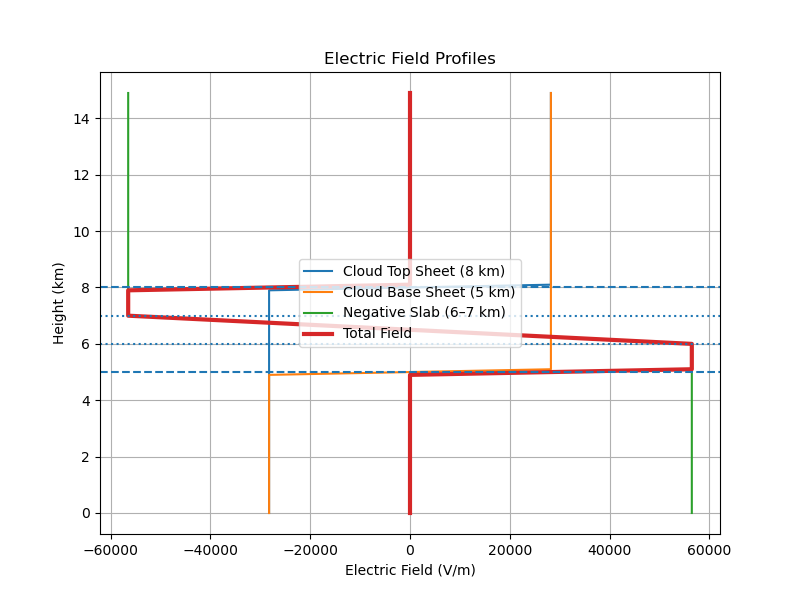

In [18]:
sigma_cloud_top= 0.5e-6    
sigma_cloud_base= 0.5e-6    
z_cloud_top= 8e3
z_cloud_base= 5e3

rho_slab= -1e-9         
z_slab_bottom= 6e3
H_slab = 1e3

E_top = np.array([sheet_E(z, z_cloud_top, sigma_cloud_top) for z in all_z])
E_base = np.array([sheet_E(z, z_cloud_base, sigma_cloud_base) for z in all_z])
E_slab = np.array([slab_E(z, z_slab_bottom, H_slab, rho_slab) for z in all_z])

E_total = E_top + E_base + E_slab

plt.figure(figsize=(8,6))

plt.plot(E_top, all_z/1000, label='Cloud Top Sheet (8 km)')
plt.plot(E_base, all_z/1000, label='Cloud Base Sheet (5 km)')
plt.plot(E_slab, all_z/1000, label='Negative Slab (6–7 km)')
plt.plot(E_total, all_z/1000, linewidth=3, label='Total Field')

plt.axhline(8, linestyle='--')
plt.axhline(5, linestyle='--')
plt.axhline(6, linestyle=':')
plt.axhline(7, linestyle=':')

plt.xlabel('Electric Field (V/m)')
plt.ylabel('Height (km)')
plt.title('Electric Field Profiles')
plt.legend()
plt.grid(True)

plt.show()

### 4. Combining charge and the effect of conductivity

Taking into account the conductivity difference of the cloud $\sigma_{\mathrm{cld}}$ and the clear air $\sigma_{\mathrm{clr}}$, use MacGorman and Rust eq. 2.4 (below) to derive an expression for the top and bottom surface charge densities $(\sigma_{q top}, \sigma_{q bot}$) as a function of the electric field at the top and bottom of the cloud. Here, we let the field inside the cloud determine the necessary "screening" charge that develops to equalize the electric field inside and outside the cloud. Assume that the ratio $\alpha = \sigma_{\mathrm{clr}}/ \sigma_{\mathrm{cld}}$ of clear and cloudy air conductivities is constant with height.

$
\begin{align}
E_{clr}(z_{top}) = E(z_{top}) + \frac{\sigma_{q top}}{2\epsilon} + \frac{\sigma_{q bot}}{2\epsilon}
\end{align}
$

$
\begin{align}
E_{cld}(z_{top}) = E(z_{top}) - \frac{\sigma_{q top}}{2\epsilon} + \frac{\sigma_{q bot}}{2\epsilon}
\end{align}
$

$
\begin{align}
E_{cld}(z_{bot}) = E(z_{bot}) - \frac{\sigma_{q top}}{2\epsilon} + \frac{\sigma_{q bot}}{2\epsilon}
\end{align}
$

$
\begin{align}
E_{clr}(z_{bot}) = E(z_{bot}) - \frac{\sigma_{q top}}{2\epsilon} - \frac{\sigma_{q bot}}{2\epsilon}
\end{align}
$

<span class="ecb">(10)</span>.


1) Apply current continuity for the top first: 
$$
\sigma_{\mathrm{clr}} \, E_{\mathrm{clr}}(z_{\mathrm{top}})
=
\sigma_{\mathrm{cld}} \, E_{\mathrm{cld}}(z_{\mathrm{top}})
$$

Divide to get an alpha: 

$$
\left(\frac{\sigma_{\mathrm{clr}}}{\sigma_{\mathrm{cld}}}\right) E_{z,\mathrm{top}}
+ \frac{\sigma_{q,\mathrm{top}}}{2\epsilon}
+ \frac{\sigma_{q,\mathrm{bot}}}{2\epsilon}
=
E_{z,\mathrm{top}}
- \frac{\sigma_{q,\mathrm{top}}}{2\epsilon}
+ \frac{\sigma_{q,\mathrm{bot}}}{2\epsilon}
$$

2) Further simplify and continue to factor out the alphas to get an expression for E(z_top):

$$
- E_{z,\mathrm{top}}
=
\left(\frac{\alpha + 1}{\alpha - 1}\right)
\frac{\sigma_{q,\mathrm{top}}}{2\epsilon}
+
\frac{\sigma_{q,\mathrm{bot}}}{2\epsilon}
$$

3) Apply the same current continuity principle for the bottom. Simplify and factor out the alphas to get an expression for E(z_bot):

$$
E_{z,\mathrm{bot}}
=
\frac{\sigma_{q,\mathrm{top}}}{2\epsilon}
+
\left(\frac{\alpha + 1}{\alpha - 1}\right)
\frac{\sigma_{q,\mathrm{bot}}}{2\epsilon}
$$

4) Using the system of equations, plug in the equation for sigma_qtop/(2*epsilon) from the bottom simplification to the top. Simplify to isolate sigma_qbot. 

$$
\sigma_{q,\mathrm{bot}}
=
\frac{2\epsilon}
{\left(\frac{\alpha+1}{\alpha-1}\right)^2 - 1}
\left(
E_{z,\mathrm{top}}
+
\left(\frac{\alpha+1}{\alpha-1}\right)
E_{z,\mathrm{bot}}
\right)
$$

5) Do the same thing to isolate sigma_qtop.

$$
\sigma_{q,\mathrm{top}}
=
-\frac{2\epsilon}
{\left(\frac{\alpha+1}{\alpha-1}\right)^2 - 1}
\left(
E_{z,\mathrm{bot}}
+
\left(\frac{\alpha+1}{\alpha-1}\right)
E_{z,\mathrm{top}}
\right)
$$

### 5. Plot the combined cloud 

Assuming a cloud base of $z=5$ km and a cloud top of $z=8$ km, the slab of charge from problem **3c.**, and the formula you derived for **4.**, plot the electric field profile produced by the combined effect of the slab of charge and the effect of the screening charge at the cloud boundary. Let $\alpha = 10$. Again ignore the effect of a conducting ground plane.

<span class="ecb">(10 pts.)</span>.

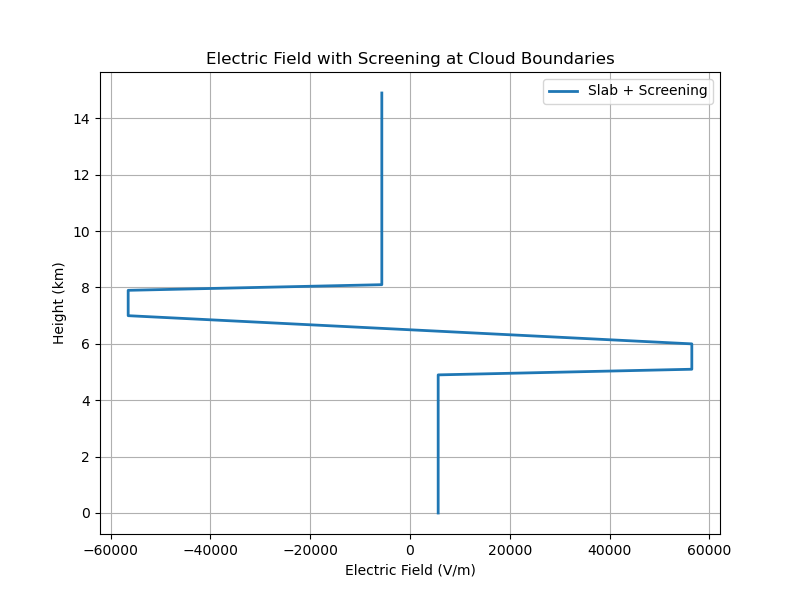

In [ ]:
alpha = 10    

E_s = np.array([slab_E(z, z_slab_bottom, H_slab, rho_slab) for z in all_z])

z_cloud_top= 8e3
z_cloud_base= 5e3

idx_bottom = np.where(all_z == z_cloud_base)[0][0]
idx_top = np.where(all_z == z_cloud_top)[0][0]

E_top_inside = E_s[idx_top]
E_base_inside = E_s[idx_bottom]


sigma_cloud_top = -2*epsilon/(((alpha+1)/(alpha-1))**2-1) * (E_base_inside + (((alpha+1)/(alpha-1))*E_top_inside))
sigma_cloud_base = 2*epsilon/(((alpha+1)/(alpha-1))**2-1) * (E_top_inside + (((alpha+1)/(alpha-1))*E_base_inside))

E_sheet_top = np.array([sheet_E(z, z_cloud_top, sigma_cloud_top) for z in all_z])
E_sheet_base = np.array([sheet_E(z, z_cloud_base, sigma_cloud_base) for z in all_z])

E_total = E_slab + E_sheet_top + E_sheet_base

plt.figure(figsize=(8,6))
plt.plot(E_total, all_z/1000, label="Slab + Screening", linewidth=2)

plt.xlabel("Electric Field (V/m)")
plt.ylabel("Height (km)")
plt.title("Electric Field with Screening at Cloud Boundaries")
plt.legend()
plt.grid()
plt.show()

### 6. Point charges

Let's now consider finite charge regions, beginning with simple point charges. Write another function, `point_E(r, r_0, q)` that mimics the function call signature of your sheet and slab, changing the arguments to reflect the parameters relevant to a point charge. Here, `r` is an array of `(x, y, z)` locations at which to calculate the electric field, and `r_0` is the `(x_0,y_0,z_0)` location of the charge given by `q`.

<span class="ecb">(10 pts.)</span>.

In [15]:
import numpy as np
import matplotlib.pyplot as plt

epsilon = 8.854e-12 

def point_E(r, r0, q):
    """
    Returns the electric field at (x,y,z) = r.
    produced by a point charge q at (x0, y0, z0) = r0.
    
    Units:
    """
    R = r - r0
    Rmag = np.linalg.norm(R, axis=-1, keepdims=True)
    Rmag[Rmag == 0] = np.nan
    
    E = (1/(4*np.pi*epsilon)) * q * R / (Rmag**3)
    return E

### 7. Plotting a stack of point charges

Assume a thunderstorm is represented by **four point charges** located at x=0, y=0 in a vertical stack, **above a conducting ground plane**. Using the function you wrote in **6.**, calculate the electric field produced by the sum of all charges and plot the elecric field vectors in the X, Z plane. 

For the point charges, use altitudes of 4, 7, 10, and 12 km, centered at x=0, and charges of +15 C, -45 C, +40 C, -20 C, to match the electric configuration in [Krehbiel et al.](http://dx.doi.org/10.1038/ngeo162) (2008, Nature Geosci., Fig. 4c, low altitude -IC).

Make 3 plots:
1. The electric field in the $x, z$ plane at +/- 10 km range from the center of the stack, and from 0 to 16 km altitude.
2. The vertical profile of the electric field from -16 to 16 km.
3. The Ex, Ey, and Ez field components with range along the ground (x coordinate), using matplotlib's `fill_between` to highlight negative values of $E_z$.

<span class="ecb">(15 pts.)</span>

In [7]:
x = np.arange(-10e3, 10e3, .2e3, dtype=float)
z = np.arange(-16e3, 16e3, .2e3, dtype=float)    
X, Z = np.meshgrid(x,z)
Y = np.zeros_like(X)

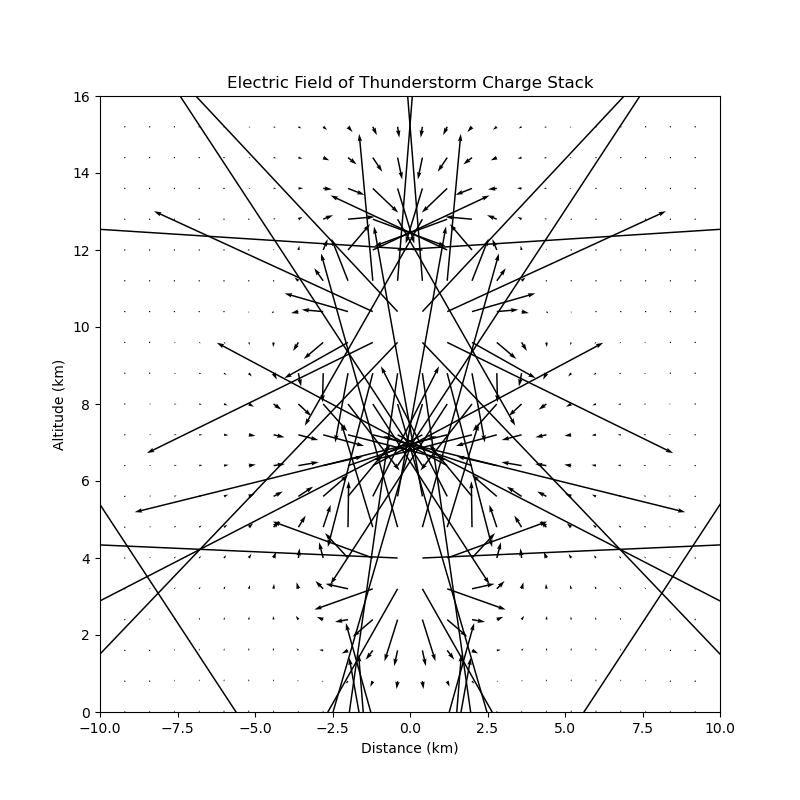

In [23]:

q = np.array([15, -45, 40, -20])
z_heights = np.array([4, 7, 10, 12]) * 1000
r0 = np.zeros((4,3))
r0[:,2] = z_heights
r = np.stack([X, Y, Z], axis=-1)

E_total = np.zeros_like(r)

for i in range(len(q)):
    E_total += point_E(r, r0[i], q[i])
    
    r_image = r0[i].copy()
    r_image[2] *= -1
    E_total += point_E(r, r_image, -q[i])

Ex = E_total[...,0]
Ez = E_total[...,2]

plt.figure(figsize=(8,8))
skip = 4

plt.quiver(X[::skip,::skip]/1000,
           Z[::skip,::skip]/1000,
           Ex[::skip,::skip],
           Ez[::skip,::skip],
           scale=5e5)

plt.xlabel("Distance (km)")
plt.ylabel("Altitude (km)")
plt.title("Electric Field of Thunderstorm Charge Stack")

plt.xlim(-10,10)
plt.ylim(0,16)

plt.show()

(160, 100)


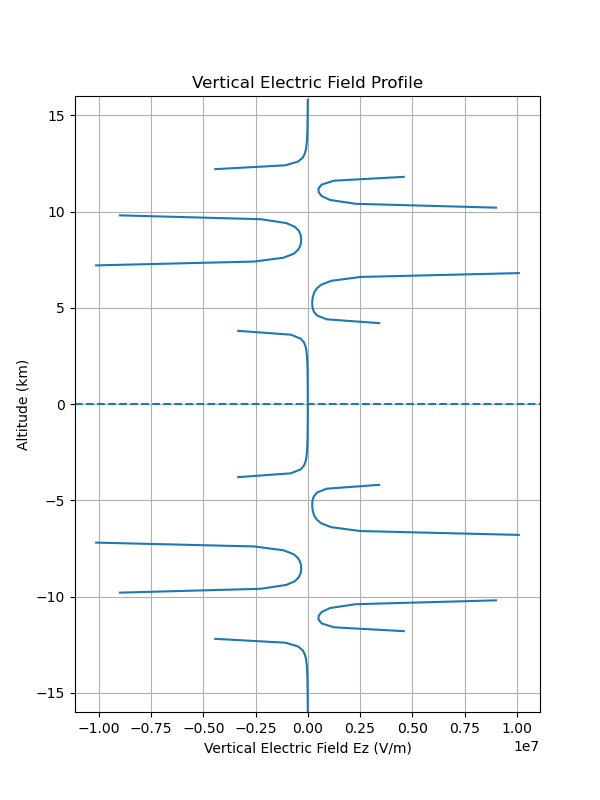

In [24]:
E_total = np.zeros_like(r)

for i in range(len(q)):
   E_total += point_E(r, r0[i], q[i])
   r_image = r0[i].copy()
   r_image[2] *= -1
   E_total += point_E(r, r_image, -q[i])


x_index = Ez.shape[1] // 2

Ex = E_total[:,:,0]
Ez = E_total[:,:,2]

print(Ez.shape)

mask = Ex[x_index, :] != 0

plt.figure(figsize=(6,8))
plt.plot(Ez[:, x_index], z/1000)

plt.axhline(0, linestyle='--') 
plt.xlabel("Vertical Electric Field Ez (V/m)")
plt.ylabel("Altitude (km)")
plt.title("Vertical Electric Field Profile")

plt.ylim(-16,16)
plt.grid()

plt.show()

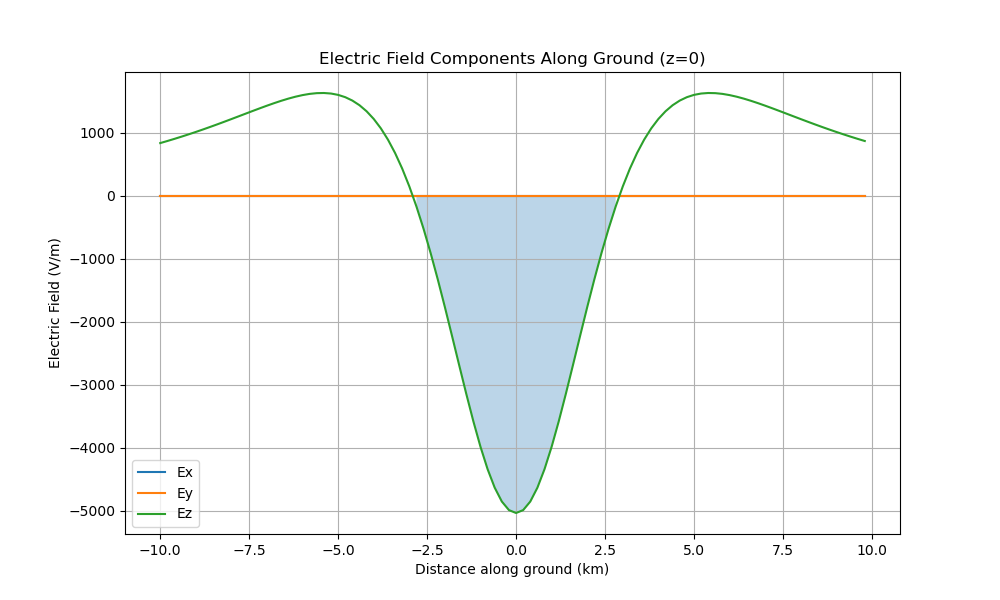

In [ ]:
E_total = np.zeros_like(r)

for i in range(len(q)):
    E_total += point_E(r, r0[i], q[i])
    
    r_image = r0[i].copy()
    r_image[2] *= -1
    E_total += point_E(r, r_image, -q[i])

z_index = Ez.shape[0] // 2

Ex = E_total[:,:,0]
Ey = E_total[:,:,1]
Ez = E_total[:,:,2]


plt.figure(figsize=(10,6))
plt.plot(x/1000, Ex[z_index,:], label='Ex')
plt.plot(x/1000, Ey[z_index,:], label='Ey')
plt.plot(x/1000, Ez[z_index,:], label='Ez')

plt.fill_between(x/1000, Ez[z_index,:], where=(Ez[z_index,:] < 0), alpha=0.3)
plt.xlabel("Distance along ground (km)")
plt.ylabel("Electric Field (V/m)")
plt.title("Electric Field Components Along Ground (z=0)")
plt.legend()
plt.grid()

plt.show()

In [25]:
print(E_total.shape)
print(x.shape)
print(Ex.shape)

(160, 100, 3)
(100,)
(160, 100)
